In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
import pdb
from tqdm import tqdm
import numpy as np
import scipy
from scipy.stats import ortho_group
import sys
from copy import deepcopy as copy
import matplotlib.pyplot as plt

In [7]:
sys.path.append('/home/akumar/nse/neural_control')

In [8]:
from utils import calc_loadings

In [3]:
# If we take a projection matrix and swap the loadings around, can we get different trajectories of subspace angles vs. loading correlation?

In [3]:
V = ortho_group.rvs(100)[:, 0:2]

In [23]:
np.random.binomial(1,  0.5)

0

In [47]:
# Take loadings and swap them. Do this (i) uniformly, (ii) amongst high loadings only, (iii) Amongst low loadings only

reps = 10
nswaps = 1000

ss_angles1 = np.zeros((reps, nswaps))
ss_angles2 = np.zeros((reps, nswaps))
ss_angles3 = np.zeros((reps, nswaps))

lc1 = np.zeros((reps, nswaps))
lc2 = np.zeros((reps, nswaps))
lc3 = np.zeros((reps, nswaps))

V1 = copy(V)
V2 = copy(V)
V3 = copy(V)

loadings = calc_loadings(V)

for i in tqdm(range(reps)):
    for j in range(nswaps):

        # Swap uniformly
        loadings1 = calc_loadings(V1)
        swap1 = np.random.choice(np.arange(V.shape[0]), 2)
        column = np.random.binomial(1, 0.5)
        pdb.set_trace()
        V1[[swap1[0], column]] = V1[[swap1[1], column]]
        pdb.set_trace()

        # Only swap upper quartile of loadings
        loadings2 = calc_loadings(V2)
        q1 = np.quantile(loadings2, 0.75)
        valid_rows = np.argwhere(loadings2 >= q1)[:, 0]

        swap2 = np.random.choice(valid_rows, 2)
        column = np.random.binomial(1, 0.5)
        V2[[swap2[0], column]] = V2[[swap2[1], column]]

        loadings3 = calc_loadings(V3)
        q4 = np.quantile(loadings3, 0.25)
        valid_rows = np.argwhere(loadings3 <= q4)[:, 0]
        swap3 = np.random.choice(valid_rows, 2)
        column = np.random.binomial(1, 0.5)
        V3[[swap3[0], column]] = V3[[swap3[1], column]]
        
        # Record statistics
        ss_angles1[i, j] = np.mean(scipy.linalg.subspace_angles(V, V1))
        ss_angles2[i, j] = np.mean(scipy.linalg.subspace_angles(V, V2))
        ss_angles3[i, j] = np.mean(scipy.linalg.subspace_angles(V, V3))

        lc1[i, j] = scipy.stats.spearmanr(loadings, loadings1)[0]
        lc2[i, j] = scipy.stats.spearmanr(loadings, loadings2)[0]
        lc3[i, j] = scipy.stats.spearmanr(loadings, loadings3)[0]
        

  0%|          | 0/10 [00:00<?, ?it/s]

> /tmp/ipykernel_9183/4087033253.py(28)<module>()
     26         column = np.random.binomial(1, 0.5)
     27         pdb.set_trace()
---> 28         V1[[swap1[0], column]] = V1[[swap1[1], column]]
     29         pdb.set_trace()
     30 

array([3.77516643e-16, 0.00000000e+00])
array([42, 89])
array([42, 89])
0
0.048146685028630565
0.09158340815684952
> /tmp/ipykernel_9183/4087033253.py(32)<module>()
     30 
     31         # Only swap upper quartile of loadings
---> 32         loadings2 = calc_loadings(V2)
     33         q1 = np.quantile(loadings2, 0.75)
     34         valid_rows = np.argwhere(loadings2 >= q1)[:, 0]

0.09158340815684952
-0.0865082770618048
0.09158340815684952
0.09158340815684952
0.09158340815684952
0.09158340815684952
0.09158340815684952


  0%|          | 0/10 [03:23<?, ?it/s]


BdbQuit: 

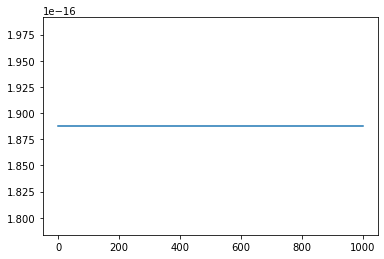

In [46]:
plt.plot(np.mean(ss_angles3, axis=0))